### Objective
The objective of this Data Challenge is to analyze the Airbnb and Zillow datasets for a real estate client, and suggest the most profitable zipcodes in New York city to invest in.

### Getting Reday

In [37]:
# Preparation and import data
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Zip=pd.read_csv("Zip_Zhvi_2bedroom.csv")
airbnb=pd.read_csv("listings.csv")


D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (43,61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [38]:
# create csv files for missing data
def report_missing_values(data_name):
    Th_missing=0  # reporting threshold
    Th_filter=3   # 
    data=eval(data_name)
    print(data.shape[0])
    missing_values_percentage = (data.isnull().sum()*100/data.shape[0]).round(2)
    missing_values_percentage = missing_values_percentage.to_frame("missing_values_percentage")
    missing_values_percentage["feature_names"] = missing_values_percentage.index
    missing_values_percentage["dtypes"] =data.dtypes
    
    missing_values_percentage.reset_index(inplace=True)
    missing_values_percentage = missing_values_percentage[["feature_names","missing_values_percentage","dtypes"]]
    missing_values_percentage = missing_values_percentage[missing_values_percentage.missing_values_percentage>=Th_missing]
    print(missing_values_percentage.head(10))
    fout=data_name+"_mssing_values_percentage.csv"
    print("See output file <{}> for all missing percentages".format(fout))
    missing_values_percentage.to_csv(fout, sep=",", index=False)
    
    sel_cols=missing_values_percentage[missing_values_percentage.missing_values_percentage<Th_filter].feature_names.tolist()
    #print(sel_cols)
    data_filtered=data[sel_cols]
    #missing_index=data[missing_values_percentage.feature_names].isnull().sum(1)>0
    #data.loc[missing_index,:].to_csv(data_name+'_missing_values.csv')
    return data_filtered

### Zillow dataset

In [39]:
# Let's look at the first row of zillow dataframe
print(Zip.shape)
Zip.head(1)

(8946, 262)


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,...,1374400,1364100,1366300,1354800.0,1327500,1317300,1333700,1352100,1390000,1431000


In [40]:
print(Zip.City.nunique(), Zip.City.unique())
# Filter city column and only leave with New York City
Zip_NY=Zip[Zip["City"]=="New York"]
print(Zip_NY.shape)
Zip_NY.head(2)

4684 ['New York' 'Chicago' 'El Paso' ... "Hart'S Location" 'Waterville Valley'
 'Shelburne Falls']
(25, 262)


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,...,1374400,1364100,1366300,1354800.0,1327500,1317300,1333700,1352100,1390000,1431000
2,61637,10023,New York,NY,New York,New York,3,NaN,NaN,NaN,...,1993500,1980700,1960900,1951300.0,1937800,1929800,1955000,2022400,2095000,2142300


In [41]:
data_name='Zip_NY'
Zip_filtered=report_missing_values(data_name)  # Keep columns with less than 3% missing
print(Zip_filtered.shape)
Zip_filtered.head(2)

25
  feature_names  missing_values_percentage   dtypes
0      RegionID                        0.0    int64
1    RegionName                        0.0    int64
2          City                        0.0   object
3         State                        0.0   object
4         Metro                        0.0   object
5    CountyName                        0.0   object
6      SizeRank                        0.0    int64
7       1996-04                       68.0  float64
8       1996-05                       68.0  float64
9       1996-06                       68.0  float64
See output file <Zip_NY_mssing_values_percentage.csv> for all missing percentages
(25, 128)


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2007-06,2007-07,2007-08,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,61639,10025,New York,NY,New York,New York,1,883400.0,896100.0,923900.0,...,1374400,1364100,1366300,1354800.0,1327500,1317300,1333700,1352100,1390000,1431000
2,61637,10023,New York,NY,New York,New York,3,1411200.0,1407400.0,1419700.0,...,1993500,1980700,1960900,1951300.0,1937800,1929800,1955000,2022400,2095000,2142300


In [42]:
# And get summary statisitcs for the categorical columnns
Zip_filtered.iloc[:,0:7].astype('category').describe().T

,count,unique,top,freq
RegionID,25,25,62120,1
RegionName,25,25,11434,1
City,25,1,New York,25
State,25,1,NY,25
Metro,25,1,New York,25
CountyName,25,4,New York,11
SizeRank,25,25,4647,1


In [43]:
# And get summary statisitcs for the numberical columnns
Zip_filtered.iloc[:,7:].astype('float').describe().T.tail()

,count,mean,std,min,25%,50%,75%,max
2017-02,25.0,1203356.0,823774.051283,303800.0,364900.0,1225000.0,1774500.0,3183300.0
2017-03,25.0,1216940.0,828135.105221,308300.0,371100.0,1219600.0,1812700.0,3160200.0
2017-04,25.0,1241344.0,845216.827250,313800.0,377200.0,1238100.0,1914600.0,3193500.0
2017-05,25.0,1268768.0,866552.282862,321300.0,383700.0,1276400.0,1997800.0,3262200.0
2017-06,25.0,1289684.0,882570.743944,327700.0,390500.0,1302300.0,2031600.0,3316500.0


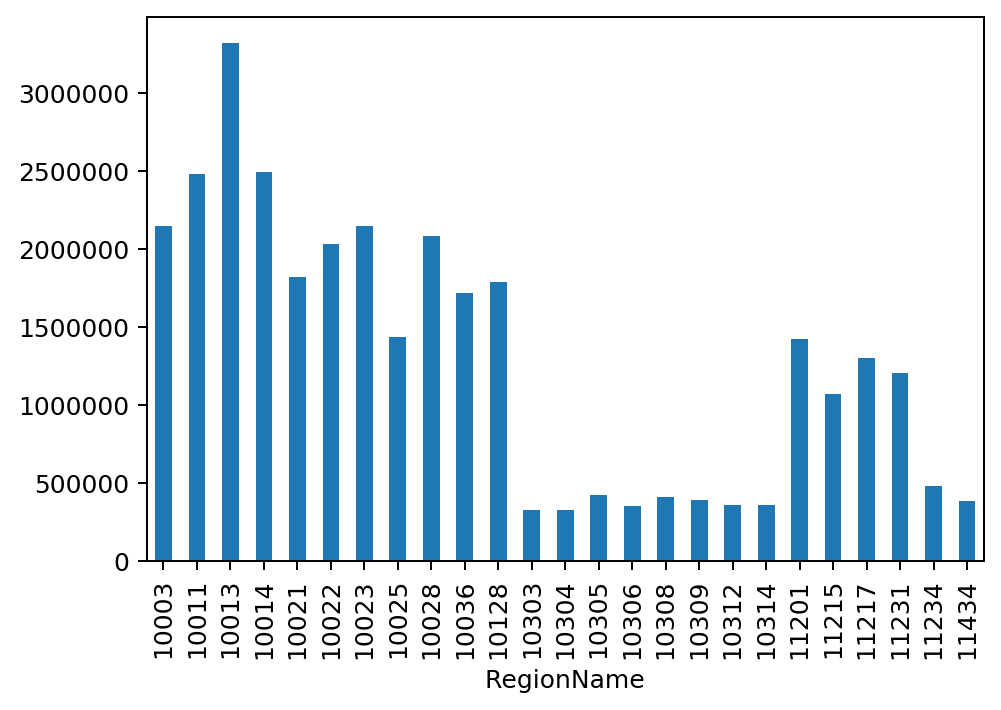

In [44]:
## draw a bar chart to see the average price of each zipcode in 2017-06
fig = plt.figure(dpi=180)
df=Zip_filtered
adf=df.groupby(['RegionName'])['2017-06'].agg(['mean'])
adf['mean'].plot('bar')

### Interpretations
Different zipcodes (RegionName) have very different average prices. The lower zipcodes have higer prices than the higher ones. Zipcode 10013 had the highest price above 30 million dollars while the prices of zipcode from 10303 to 10314 were the lowest below 0.5 million dollars.

In [45]:
df.SizeRank.unique() #population

array([   1,    3,   14,   15,   21,   32,   52,   68,   71,  109,  190,
        379,  580,  622,  668,  764,  894, 1555, 1744, 1817, 1958, 2087,
       3682, 4149, 4647], dtype=int64)

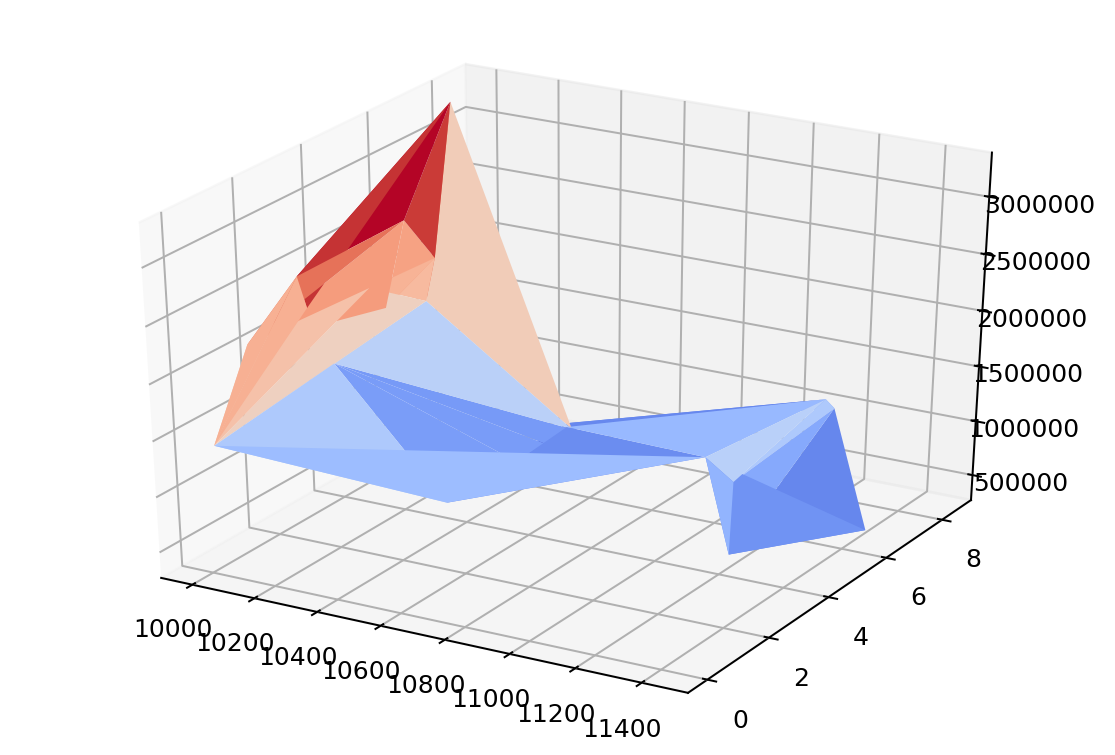

In [46]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure(dpi=180)
ax = Axes3D(fig)
ax.plot_trisurf(df['RegionName'], df['SizeRank'].apply(np.log), df['2017-06'], cmap=cm.coolwarm, linewidth=0.5)
# I have applied np.log on the SizeRank column in order to make a better comparison and visualization

### Interpretations
Property prices look highest near Zipcode 10000 and SizeRank higher regions. The top of the 3D plot tells us that those who live in a lager house with an area of lower population desity are rich and the zipcodes are between 10000 and 10200.

### Airbnb dataset

In [47]:
#Shape of Airbnb data frame
print(airbnb.shape)

(48895, 106)


In [48]:
# get airbnb with only 2 bedrooms
airbnb_2brs=airbnb[airbnb["bedrooms"]==2]
print(airbnb_2brs.shape)

# find the number of unique zipcodes in New York city
print(airbnb_2brs.city.unique().tolist())
airbnb_2brs.zipcode.nunique()

(6497, 106)
['New York', 'Brooklyn', 'Queens', 'Long Island City', 'Riverdale ', 'Bronx', 'Staten Island', 'Brooklyn ', 'Astoria', 'Jamaica', 'ASTORIA', 'long island city', 'NY', 'Kew Garden Hills\nnew York', 'LONG ISLAND CITY', 'Rockaway beach', 'Fort Greene, Brooklyn', 'Park Slope, Brooklyn', 'bronx', 'Saint Albans(Queens)', 'EAST ELMHURST', 'jackson heights', 'New York City', 'Woodside', nan, 'Astoria ', 'Brooklyn, New York', 'Bushwick/Ridgewood', 'Forest Hills', 'RIVERDALE', 'Bushwick', 'astoria', 'Chelsea, New York', 'Long Island city', 'Fresh Meadows ', 'MIDDLE VILLAGE', 'new york', 'East Elmhurst', 'New York ', 'Queens ', 'Jackson Heights', 'Brookyn ', 'Ridgewood', 'Flushing ', 'Rockaway Beach', 'Forest Hills ', 'Rosedale ', 'Williamsburg,Brooklyn', 'Flushing', 'Jackson Heights ', 'Greenpoint, Brooklyn', 'Brooklyn, NY 11221 ', 'Ridgewood ', 'flushing', 'Howard Beach', 'Glendale ', 'Arverne', 'Sunnyside ', 'Woodside ', ' Brooklyn', 'NYC', 'brooklyn', 'Flushing or east Elmhurst ',

314

In [49]:
data_name='airbnb_2brs'
airbnb_2brs_filtered=report_missing_values(data_name)  # Keep columns with less than 3% missing
airbnb_2brs_filtered.head(2)

6497
           feature_names  missing_values_percentage  dtypes
0                     id                       0.00   int64
1            listing_url                       0.00  object
2              scrape_id                       0.00   int64
3           last_scraped                       0.00  object
4                   name                       0.00  object
5                summary                       3.77  object
6                  space                      25.29  object
7            description                       1.25  object
8    experiences_offered                       0.00  object
9  neighborhood_overview                      33.51  object
See output file <airbnb_2brs_mssing_values_percentage.csv> for all missing percentages


,id,listing_url,scrape_id,last_scraped,name,description,experiences_offered,picture_url,host_id,host_url,...,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
19,7750,https://www.airbnb.com/rooms/7750,20190708031610,2019-07-08,Huge 2 BR Upper East Cental Park,Large Furnished 2BR one block to Central Park...,none,https://a0.muscache.com/im/pictures/30595787/6...,17985,https://www.airbnb.com/users/show/17985,...,f,f,f,flexible,f,f,2,1,1,0
48,13050,https://www.airbnb.com/rooms/13050,20190708031610,2019-07-09,bright and stylish duplex,"Wonderfully bright, comfortable, and stylish, ...",none,https://a0.muscache.com/im/pictures/207288e5-e...,50846,https://www.airbnb.com/users/show/50846,...,f,f,f,strict_14_with_grace_period,f,f,1,1,0,0


### Data Selction and Cleaning

In [50]:
# pick the columns I need for later use: id, zipcode, property_type, and price
airbnb_2brs_filtered=airbnb_2brs_filtered[['id', 'zipcode', 'property_type', 'price']]


In [51]:
# Convert "price" data type from object to number
airbnb_2brs_filtered['price']=airbnb_2brs_filtered['price'].str.replace('$','')\
        .str.replace(',','').astype(float)

airbnb_2brs_filtered.price.describe()


count    6497.000000
mean      232.521471
std       290.087418
min         0.000000
25%       130.000000
50%       185.000000
75%       265.000000
max      9999.000000
Name: price, dtype: float64

In [52]:
airbnb_2brs_filtered.head(2)

,id,zipcode,property_type,price
19,7750,10029,Apartment,190.0
48,13050,11221,Townhouse,115.0


In [53]:
# Let's briefly loot at the two datasets 
df0=airbnb_2brs_filtered.dropna().copy();

df1=Zip_filtered.iloc[:,list((1,2,4,5,6))+[-1]] # I only want to use the lastest price which is in 2017-06 
print(df0.head(2))
df1.head(2)

       id zipcode property_type  price
19   7750   10029     Apartment  190.0
48  13050   11221     Townhouse  115.0


,RegionName,City,Metro,CountyName,SizeRank,2017-06
0,10025,New York,New York,New York,1,1431000
2,10023,New York,New York,New York,3,2142300


In [54]:
# make data consistent: to make sure that the zipcodes are all integers with five numbers
df0.zipcode=[i[0:5] if isinstance(i,str) else str(i) for i in df0.zipcode]
df0.zipcode=df0.zipcode.str.replace('.','').astype('int')
df0.zipcode.unique()[-20:]

array([104560, 104730, 113580, 113650, 103140, 103090, 110030, 104680,
       112190, 114360, 103060, 104580, 114210, 114280, 114260, 100040,
       114110, 104520, 104710, 100690], dtype=int64)

In [55]:
# make data consistent: to make sure that the zipcodes are all integers with five numbers
df1.RegionName=df1.RegionName.astype('int')

D:\Anaconda\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


### Data Merging

In [56]:
df=df0.merge(df1, left_on='zipcode', right_on='RegionName',how='left').dropna()
df.rename(columns={'price':'listing_price','2017-06':'property_price'},inplace=True)
df['pe_ratio']=df.eval('property_price/listing_price/365/0.75')  
# to get price to earningS ratio: property price divided by daily price divided by 365 days and 75% occupancy rate
df.head()

,id,zipcode,property_type,listing_price,RegionName,City,Metro,CountyName,SizeRank,property_price,pe_ratio
5,16458,11215,Condominium,225.0,11215.0,New York,New York,Kings,71.0,1070800.0,17.384881
10,20853,11217,Apartment,250.0,11217.0,New York,New York,Kings,1555.0,1302300.0,19.029041
11,23135,11231,Apartment,175.0,11231.0,New York,New York,Kings,1817.0,1202900.0,25.109459
14,27006,10023,Apartment,235.0,10023.0,New York,New York,New York,3.0,2142300.0,33.301078
15,27659,11215,Apartment,400.0,11215.0,New York,New York,Kings,71.0,1070800.0,9.778995


pe_ratio                             property_price
                    mean     median        std count           mean
property_type                                                      
Apartment      31.727074  27.939987  18.821078   924   1.784447e+06
House          22.296012  17.951926  16.444641    41   1.135498e+06
Loft           24.988749  23.786301  12.099295    41   2.411332e+06
Townhouse      29.278037  28.079573  14.391113    34   1.534838e+06
Condominium    22.832012  21.120797  13.863964    31   1.664568e+06

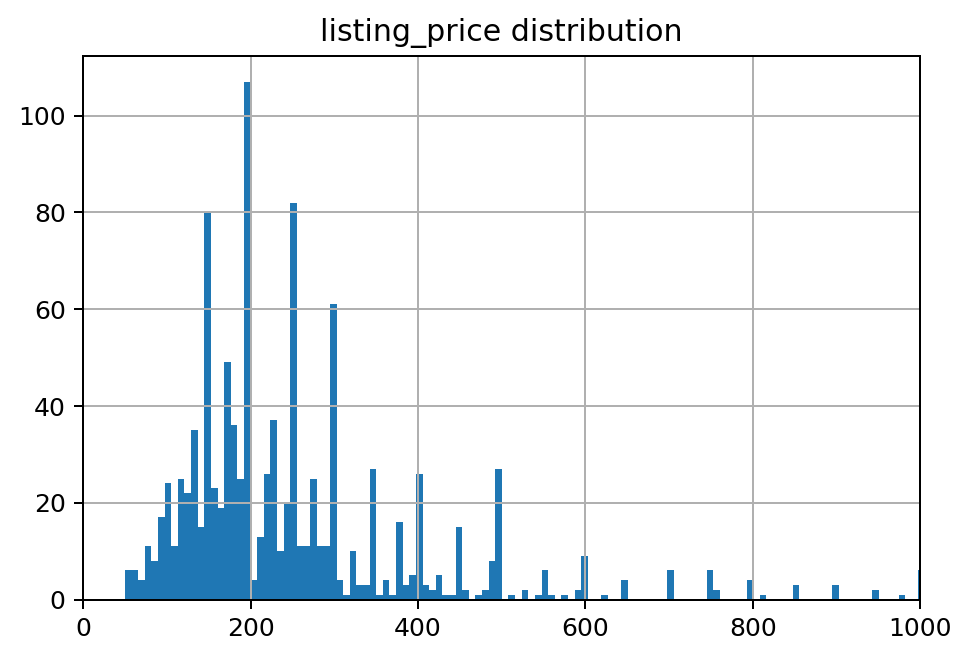

In [59]:
# airbnb listing price distribution
fig = plt.figure(dpi=180)
ax0=df.listing_price.hist(bins=500)
ax0.set_xlim(0,1000)
plt.title('listing_price distribution')
pe_ratio=df.groupby(['property_type']).agg({'pe_ratio': ['mean','median','std','count'],'property_price': ['mean']} ).sort_values(('pe_ratio','count'),ascending=False)
pe_ratio.head()

### Interpretations
The distribution plot is apparently right skewed. Different property types has different PE ratio. Look at the mean price, it didn't make much sense that house are cheaper. The majority prices are between 50 to 400, however there are some over 600 dollars. This is because Zillow provides 2-bedrooms property prices, which are more like apartment of condo, or town house, in addtion, airbnb two-bedrooms rental can be part of the house, which would be a complicated factor and may polutate the analysis conclusion. Also apartment type dominates the records, let's consider it only

In [60]:
pe_ratio.to_csv('pe_ratio.csv')

In [61]:
# let's look at the new data set
top1=pe_ratio.head(1).index.tolist()
df2=df[df.property_type.isin(top1)]
df2.head()

,id,zipcode,property_type,listing_price,RegionName,City,Metro,CountyName,SizeRank,property_price,pe_ratio
10,20853,11217,Apartment,250.0,11217.0,New York,New York,Kings,1555.0,1302300.0,19.029041
11,23135,11231,Apartment,175.0,11231.0,New York,New York,Kings,1817.0,1202900.0,25.109459
14,27006,10023,Apartment,235.0,10023.0,New York,New York,New York,3.0,2142300.0,33.301078
15,27659,11215,Apartment,400.0,11215.0,New York,New York,Kings,71.0,1070800.0,9.778995
17,32331,11201,Apartment,140.0,11201.0,New York,New York,Kings,32.0,1420700.0,37.069798


In [62]:
# get unique zipcodes
df2.zipcode.sort_values().unique()

array([10003, 10011, 10013, 10014, 10021, 10022, 10023, 10025, 10028,
       10036, 10128, 10303, 10304, 10305, 10314, 11201, 11215, 11217,
       11231, 11234, 11434], dtype=int64)

In [63]:
adf2=df2.groupby(['property_type','zipcode']).pe_ratio.agg(['mean','count']).rename({'mean':'pe_ratio'},axis='columns')\
    .reset_index(drop=False) .sort_values(by=['property_type','pe_ratio'],ascending=True)

In [64]:
adf2.set_index('zipcode',inplace=True)
adf3=adf2[adf2['count']>=5].sort_values('pe_ratio')

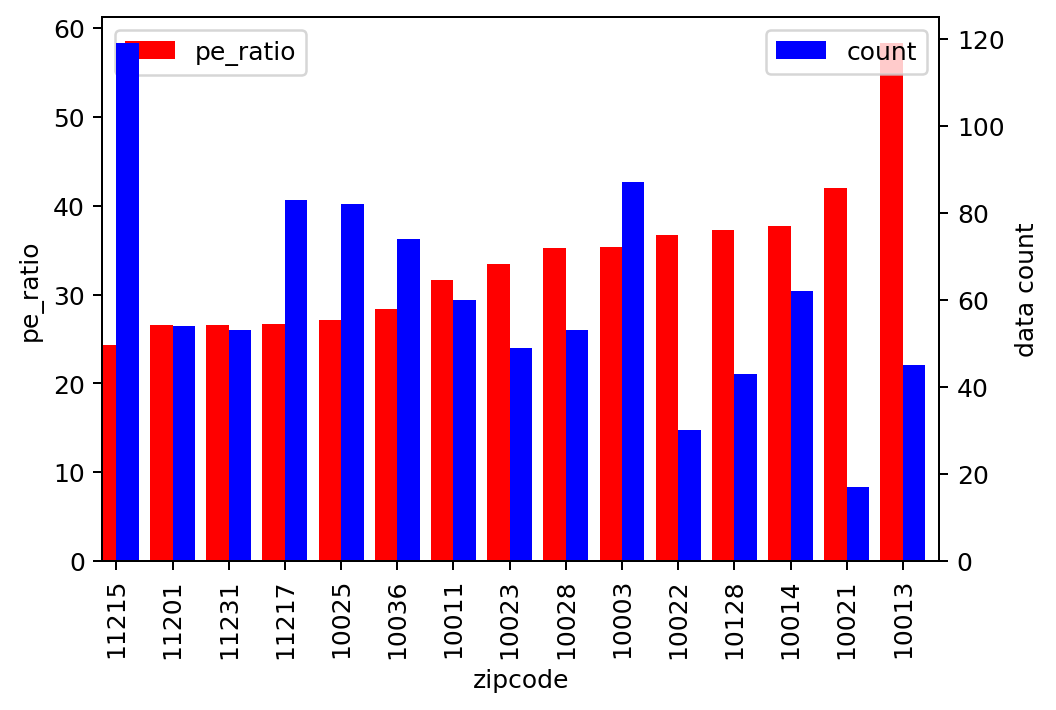

In [65]:
fig = plt.figure(dpi=180) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

adf3['pe_ratio'].plot(kind='bar',color='red', label='pe_ratio',ax=ax, width=width, position=1)
adf3['count'].plot(kind='bar', color='blue', label='count',ax=ax2, width=width, position=0)

# ax.set_ylabel('pl_ratio'); ax.legend(loc='upper left', frameon=False)
# ax2.set_ylabel('count'); ax2.legend(loc='center left', frameon=False)
ax.set_ylabel('pe_ratio'); ax.legend()
ax2.set_ylabel('data count'); ax2.legend()

plt.show()


### Interpretations
I would like to compare the numbers and PE ratios of the zipcodes with each other. I wouldn't consider the small count of the zipcodes because less properties may not mean be a good investment. 10013 has the highest PE ratio while 11215 has the most properties.

In [66]:
# get lower pe ratio
adf4=adf3[adf3.pe_ratio<=30]; adf4

,property_type,pe_ratio,count
zipcode,,,
11215,Apartment,24.306435,119
11201,Apartment,26.537219,54
11231,Apartment,26.613603,53
11217,Apartment,26.690632,83
10025,Apartment,27.162862,82
10036,Apartment,28.359759,74


## Conclusion

In [67]:
# conclusion
print("Zipcodes for top ranked airbnd return in NewYork city:", adf4.index.tolist())

Zipcodes for top ranked airbnd return in NewYork city: [11215, 11201, 11231, 11217, 10025, 10036]


The apartment dataset is strong enough to support my analysis. I conclude that zipcodes: 11215, 11201, 11231, 11217, 10025 and 10036 are good to invest in because of their lower PE ratios so I would recommende these zipcodes to my clients.